

# AAI612: Deep Learning & its Applications

*Notebook 4.3: Graded Assignment: Mini Project I*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week4/Notebook4.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assessment

In this assessment, you will train a new model that is able to recognize fresh and rotten fruit. You will need to get the model to a validation accuracy of `92%` in order to pass the assessment, though we challenge you to do even better if you can. You will have the use the skills that you learned in the previous exercises. Specifically, we suggest using some combination of transfer learning, data augmentation, and fine tuning.

## The Dataset

In this exercise, you will train a model to recognize fresh and rotten fruits. Download the dataset from [Kaggle](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification). The dataset structure is in the `data/fruits` folder. There are 6 categories of fruits: fresh apples, fresh oranges, fresh bananas, rotten apples, rotten oranges, and rotten bananas. This will mean that your model will require an output layer of 6 neurons to do the categorization successfully. You'll also need to compile the model with `categorical_crossentropy`, as we have more than two categories.

![image.png](attachment:4c8c02c9-0cbe-4048-8d01-cdd5e3cf3fe6.png)<img src="https://github.com/harmanani/AAI612/blob/main/Week4/images/fruits.png?raw=1" style="width: 600px;">

In [1]:
#download data from the folder

!wget https://raw.githubusercontent.com/harmanani/AAI612/a9fbfe6c1bd36ec86071d9589e3b4a035a9afb89/Week4/data.zip
!unzip data.zip


--2025-02-08 09:16:28--  https://raw.githubusercontent.com/harmanani/AAI612/a9fbfe6c1bd36ec86071d9589e3b4a035a9afb89/Week4/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94837216 (90M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  90.44M   169MB/s    in 0.5s    

2025-02-08 09:16:31 (169 MB/s) - ‘data.zip’ saved [94837216/94837216]

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/fruits/
   creating: data/fruits/valid/
  inflating: data/fruits/.DS_Store   
  inflating: __MACOSX/data/fruits/._.DS_Store  
   creating: data/fruits/train/
   creating: data/fruits/valid/freshbanana/
   creating: data/fruits/valid/rottenbanana

## Load ImageNet Base Model

Start with a model pretrained on `ImageNet`. Load the model with the correct weights, set an input shape, and choose to remove the last layers of the model. Remember that images have three dimensions: a height, and width, and a number of channels. Because these pictures are in color, there will be three channels for red, green, and blue. We've filled in the input shape for you. This cannot be changed or the assessment will fail. If you need a reference for setting up the pretrained model, please take a look at [Notebook 4.2](https://github.com/harmanani/AAI612/blob/main/Week4/Notebook%204.2.ipynb) where we implemented transfer learning.

In [2]:
import ssl
from tensorflow import keras

ssl._create_default_https_context = ssl._create_unverified_context


base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Freeze Base Model

Next, we suggest freezing the base model. This is done so that all the learning from the ImageNet dataset does not get destroyed in the initial training.

In [3]:
# Freeze base model
base_model.trainable = False

## Add Layers to Model

Now it's time to add layers to the pretrained model. Pay close attention to the last dense layer and make sure it has the correct number of neurons to classify the different types of fruit.  You may add more layers than specified below.

In [5]:
from tensorflow.keras.layers import Dense
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
# Add final dense layer
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)


In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,558 (56.64 MB)

 Trainable params: 132,870 (519.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Compile Model

Now it's time to compile the model with loss and metrics options. Remember that we're training on a number of different categories, rather than a binary classification problem.

In [7]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

## Augment the Data

If you'd like, try to augment the data to improve the dataset. There is also documentation for the [Keras ImageDataGenerator class](https://keras.io/api/preprocessing/image/#imagedatagenerator-class). This step is optional, but it may be helpful to get to 92% accuracy.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        brightness_range=[0.2,1.2])





## Load Dataset

Now it's time to load the train and validation datasets. Pick the right folders, as well as the right `target_size` of the images (it needs to match the height and width input of the model you've created).

In [9]:
traindata = '/content/data/fruits/train'
validdata = '/content/data/fruits/valid'


# load and iterate training dataset
train_it = datagen.flow_from_directory(traindata,
                                       target_size=(224,224),
                                       color_mode='rgb',
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory(validdata,
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="categorical")

Found 249 images belonging to 6 classes.
Found 66 images belonging to 6 classes.


## Train the Model

Time to train the model! Pass the `train` and `valid` iterators into the `fit` function, as well as setting your desired number of epochs.

In [16]:
trainmodel = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=int(train_it.samples/train_it.batch_size),
          validation_steps=int(valid_it.samples/valid_it.batch_size),
          epochs=10)

Epoch 1/10
2/7 ━━━━━━━━━━━━━━━━━━━━ 1:39 20s/step - accuracy: 1.0000 - loss: 0.0158

KeyboardInterrupt: 

8/8 ━━━━━━━━━━━━━━━━━━━━ 143s 18s/step - accuracy: 1.0000 - loss: 0.0142
Training Accuracy: 100.00%, Loss: 0.0125


NameError: name 'history' is not defined

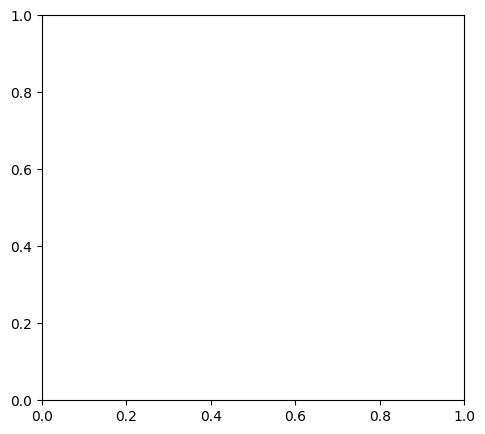

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Evaluate Data Training
train_loss, train_acc = model.evaluate(train_it)
print(f"Training Accuracy: {train_acc * 100:.2f}%, Loss: {train_loss:.4f}")

# Visualisasi Kurva Akurasi dan Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(trainmodel.history['accuracy'], label='Train Accuracy')
plt.plot(trainmodel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trainmodel.history['loss'], label='Train Loss')
plt.plot(trainmodel.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:

# Classification Report Training
train_predictions = np.argmax(model.predict(train_it), axis=1)
true_train_labels = train_it.classes
train_class_names = list(train_it.class_indices.keys())

print("Classification Report (Training):")
print(classification_report(true_train_labels, train_predictions, target_names=train_class_names))

In [ ]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(true_train_labels, train_predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training)')
plt.colorbar()
tick_marks = np.arange(len(train_class_names))
plt.xticks(tick_marks, train_class_names, rotation=45)
plt.yticks(tick_marks, train_class_names)

for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        plt.text(j, i, format(conf_matrix_train[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_train[i, j] > conf_matrix_train.max() / 2. else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [ ]:

# Perhitungan mAP dan IoU untuk Training
from sklearn.metrics import average_precision_score, jaccard_score

# Convert ke One-Hot Encoding untuk mAP
true_train_labels_one_hot = np.eye(len(train_class_names))[true_train_labels]
train_predictions_prob = model.predict(train_it)

# Mean Average Precision (mAP)
mAP_train = average_precision_score(true_train_labels_one_hot, train_predictions_prob, average="macro")
print(f"Mean Average Precision (Training): {mAP_train:.4f}")

# Intersection over Union (IoU)
IoU_train = jaccard_score(true_train_labels, train_predictions, average="macro")
print(f"Intersection over Union (IoU) (Training): {IoU_train:.4f}")

## Unfreeze Model for Fine Tuning

If you have reached 92% validation accuracy already, this next step is optional. If not, we suggest fine tuning the model with a very low learning rate.

In [ ]:
# Unfreeze the base model
base_model.trainable = FIXME

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = FIXME), loss = FIXME , metrics = FIXME)

In [ ]:
model.fit(FIXME,
          validation_data=FIXME,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=FIXME)

## Evaluate the Model

Hopefully, you now have a model that has a validation accuracy of 92% or higher. If not, you may want to go back and either run more epochs of training, or adjust your data augmentation.

## Discussion